# Cleaning and Exploratory Analysis of Superstore Dataset, USA
### Creating a workable descriptive analysis from the popular Superstore dataset found on Kaggle.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series 
import seaborn as sns
#import calmap
#from pandas_profiling import ProfileReport



Link to data source: 

Data Dictionary:
Column names and descriptions 

In [159]:
data = pd.read_csv('superstore.csv', encoding= 'unicode_escape')
print(data.head(5))


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [160]:
#A quick summary of the data. No missing values, Data types correspond with column names.
#Although Order Date and Ship Date will need to be converted to date or int for further analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [161]:
#Convert values in Order Date and Ship Date columns to datetime data types. 
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Ship Date"] = pd.to_datetime(data["Ship Date"])
data["Postal Code"] = data["Postal Code"].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   object        
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [162]:
#Removing Row ID column as it is redundant and not useful for analysis 
data.drop('Row ID', axis=1, inplace = True)


In [163]:
#Exploring the min and max values in columns to view any potential outliers. 
data.min()

Order ID                                            CA-2014-100006
Order Date                                     2014-01-03 00:00:00
Ship Date                                      2014-01-07 00:00:00
Ship Mode                                              First Class
Customer ID                                               AA-10315
Customer Name                                        Aaron Bergman
Segment                                                   Consumer
Country                                              United States
City                                                      Aberdeen
State                                                      Alabama
Postal Code                                                  10009
Region                                                     Central
Product ID                                         FUR-BO-10000112
Category                                                 Furniture
Sub-Category                                           Accesso

In [164]:
data.max()

Order ID                             US-2017-169551
Order Date                      2017-12-30 00:00:00
Ship Date                       2018-01-05 00:00:00
Ship Mode                            Standard Class
Customer ID                                ZD-21925
Customer Name                    Zuschuss Donatelli
Segment                                 Home Office
Country                               United States
City                                           Yuma
State                                       Wyoming
Postal Code                                   99301
Region                                         West
Product ID                          TEC-PH-10004977
Category                                 Technology
Sub-Category                                 Tables
Product Name     netTALK DUO VoIP Telephone Service
Sales                                       22638.5
Quantity                                         14
Discount                                        0.8
Profit      

Imediately we can see items that require further investigation. 
Starting with the mininum value of the data set: 
1. In the Sales column there was an item sold for only 0.44 cents
2. In the profit column there was a profit loss of $6,599.98

In the Maximum values:
1. Sales had a max of $22,638.50. Certainly not improbable, but the variation between 0.44 is large and is worth investigating 
2. Discount of 80%. Again, not improbable, but worth confirming

Let us confirm these are extreme outliers by sorting them into ascendign and decending order and then looking at the first ten rows of the Sales and Profit columns.

In [165]:
sales_min = data["Sales"].sort_values()
sales_min.head(10)

4101    0.444
9292    0.556
8658    0.836
4711    0.852
2106    0.876
7548    0.898
8033    0.984
2761    0.990
8024    1.044
1332    1.080
Name: Sales, dtype: float64

In [166]:
sales_max = data["Sales"].sort_values(ascending = False)
sales_max.head(10)

2697    22638.480
6826    17499.950
8153    13999.960
2623    11199.968
4190    10499.970
9039     9892.740
4098     9449.950
4277     9099.930
8488     8749.950
6425     8399.976
Name: Sales, dtype: float64

In [167]:
profit_min = data['Profit'].sort_values()
profit_min.head(10)

7772   -6599.9780
683    -3839.9904
9774   -3701.8928
3011   -3399.9800
4991   -2929.4845
3151   -2639.9912
5310   -2287.7820
9639   -1862.3124
1199   -1850.9464
2697   -1811.0784
Name: Profit, dtype: float64

In [168]:
profit_max = data['Profit'].sort_values(ascending= False)
profit_max.head(10)

6826    8399.9760
8153    6719.9808
4190    5039.9856
9039    4946.3700
4098    4630.4755
2623    3919.9888
509     3177.4750
8488    2799.9840
7666    2591.9568
6520    2504.2216
Name: Profit, dtype: float64

The recommendation would be to remove several of these outliers has they can skew the analysis. 
Profit: -6599.98 & 
Profit: 8399.98

In [169]:
#removing max value and printing out new max
data = data.loc[data['Profit'] != data['Profit'].max()]
data['Profit'].max()

6719.9808

In [170]:
#removing min value and printing out new min
data = data.loc[data['Profit'] != data['Profit'].min()]
data['Profit'].min()

-3839.9904

In [171]:
#Exploring the number of unique values in certain columns to determine if incorrect entries were made
data["Ship Mode"].value_counts()

Standard Class    5966
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [172]:
data["Country"].value_counts()

United States    9992
Name: Country, dtype: int64

In [173]:
data["Region"].value_counts()

West       3203
East       2847
Central    2322
South      1620
Name: Region, dtype: int64

In [174]:
data["State"].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     468
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  148
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

Would recommend removing the Country Column of this data set from analysis as all data is from the United States and instead consider renaming the data set or the analysis to include the "USA" in the title for clarifcation. Reviewing the State column we can see no states from outside the US listed. 


In [175]:
#Removing columns unneccessary for analysis
data.drop('Country', axis=1, inplace = True)
print(data.head())

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment             City       State Postal Code Region  \
0      Claire Gute   Consumer        Henderson    Kentucky       42420  South   
1      Claire Gute   Consumer        Henderson    Kentucky       42420  South   
2  Darrin Van Huff  Corporate      Los Angeles  California       90036   West   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida       33311  South   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida       33311  South   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furnitur

In [176]:
print(data.columns.tolist()) #print column names

['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [177]:
 #Created a column to show the lead time, 
#length of time between when an order was placed and when it shipped
data['Lead Time'] = data['Ship Date'] - data['Order Date']
print(data['Lead Time'].head())

0   3 days
1   3 days
2   4 days
3   7 days
4   7 days
Name: Lead Time, dtype: timedelta64[ns]


In [178]:
#Removed 'days' from value and converted it to integer
data['Lead Time'] = data['Lead Time'].astype(str)
data['Lead Time'] = data['Lead Time'].str.replace('days', '')
data['Lead Time'] = data['Lead Time'].str.replace('00:00:00.000000000', '')
data['Lead Time'] = data['Lead Time'].str.lstrip()
data['Lead Time'] = data['Lead Time'].str.rstrip()
data['Lead Time'] = data['Lead Time'].astype(int)
print(data['Lead Time'].head())

0    3
1    3
2    4
3    7
4    7
Name: Lead Time, dtype: int32


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9992 non-null   object        
 1   Order Date     9992 non-null   datetime64[ns]
 2   Ship Date      9992 non-null   datetime64[ns]
 3   Ship Mode      9992 non-null   object        
 4   Customer ID    9992 non-null   object        
 5   Customer Name  9992 non-null   object        
 6   Segment        9992 non-null   object        
 7   City           9992 non-null   object        
 8   State          9992 non-null   object        
 9   Postal Code    9992 non-null   object        
 10  Region         9992 non-null   object        
 11  Product ID     9992 non-null   object        
 12  Category       9992 non-null   object        
 13  Sub-Category   9992 non-null   object        
 14  Product Name   9992 non-null   object        
 15  Sales          9992 n

In [180]:
data.describe()

,Sales,Quantity,Discount,Profit,Lead Time
count,9992.000000,9992.000000,9992.000000,9992.000000,9992.000000
mean,227.702254,3.789331,0.156164,28.482488,3.957566
std,597.352533,2.225266,0.206395,208.510680,1.747212
min,0.444000,1.000000,0.000000,-3839.990400,0.000000
25%,17.272000,2.000000,0.000000,1.730250,3.000000
50%,54.432000,3.000000,0.200000,8.666500,4.000000
75%,209.932500,5.000000,0.200000,29.364000,5.000000
max,22638.480000,14.000000,0.800000,6719.980800,7.000000


Univariate Analysis:
1. What is the distribution of profit and is it skewed?
2. Do aggregate sales differ much between product categories? 

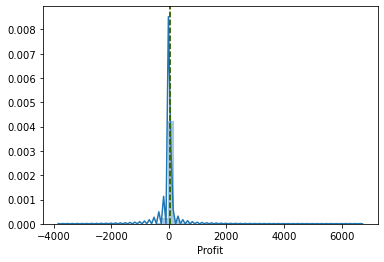

In [212]:
sns.distplot(data['Profit'])
plt.axvline(x=np.mean(data['Profit']), c= 'red', ls= '--')
plt.axvline(x=np.percentile(data['Profit'], 75), c='green', ls='--')

Profit is skewed to the right and is concentrated around zero. Dispite a max value(with outloier removed) of 6719.98, the mean is only 28.48 and the 75th percentile is 29.36 and the 25th percentile of 1.73. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A1D29182E0>,
      dtype=object)

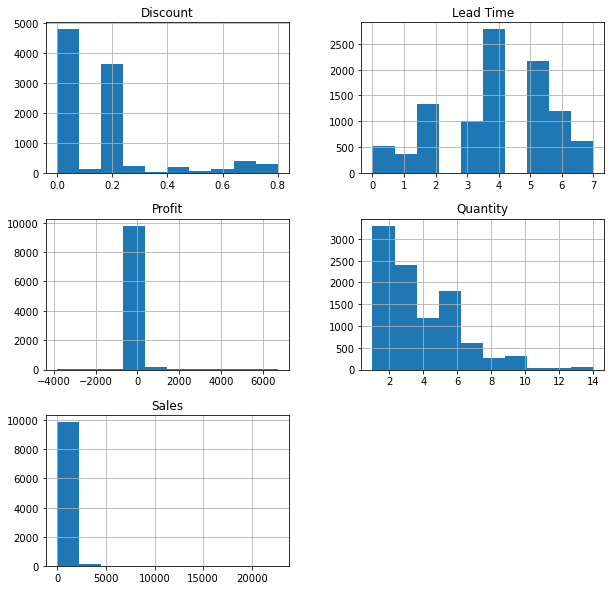

In [182]:
data.hist(figsize=(10,10))
#Displays quick visualizations of numerical columns 

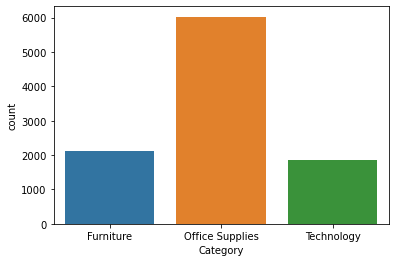

In [213]:
sns.countplot(data['Category'])
#count plot good for categorical data

We can clearly see that Office Supplies account for the majority of sales.

In [193]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2120
Technology         1845
Name: Category, dtype: int64

Bivariate Analysis
1. Is there a relationship between category and lead time
2. Is there a notable trend in profit?


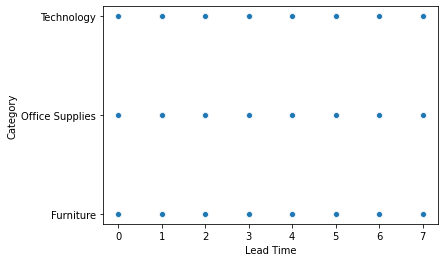

In [220]:
#is Lead time influenced by the product category?

sns.scatterplot(data['Lead Time'], data['Category'])

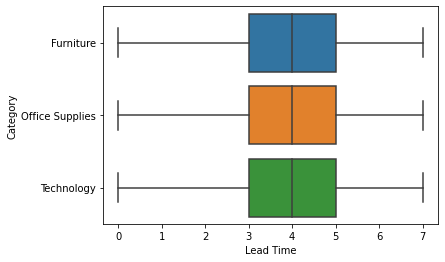

In [186]:
sns.boxplot(x=data['Lead Time'], y=data['Category'])

In [187]:
data[data.duplicated()==True]
#displays which rows are duplicates

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Lead Time
3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588,4


In [188]:
#drop duplicates
data.drop_duplicates(inplace=True)

In [189]:
data.duplicated().sum()

0

In [190]:
data.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Lead Time        0
dtype: int64

In [191]:
np.round(data.corr(),2)
#correlation maxtrix of columns containing numeric values 

,Sales,Quantity,Discount,Profit,Lead Time
Sales,1.00,0.21,-0.03,0.47,-0.01
Quantity,0.21,1.00,0.01,0.07,0.02
Discount,-0.03,0.01,1.00,-0.24,0.00
Profit,0.47,0.07,-0.24,1.00,-0.01
Lead Time,-0.01,0.02,0.00,-0.01,1.00


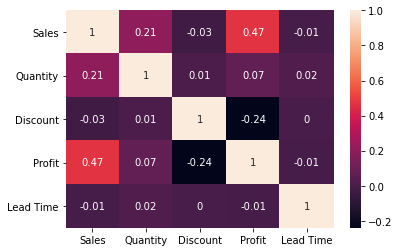

In [192]:
#heatmap visulaizing correlations. No real strong correlations beyond profit and sales. 
sns.heatmap(np.round(data.corr(),2), annot=True)